In [1]:
import shapely
import pandas as pd
import numpy as np

x_min = 0.2
x_max = 0.8
y_min = 0.1
y_max = 0.3


num_points = 4
num_polygons = 1000
polygons = pd.DataFrame()
for i in range(num_points):
    polygons[f'x_{i}']= np.zeros(num_polygons)
    polygons[f'y_{i}']= np.zeros(num_polygons)
polygons_geometries=[]

for i in range(num_polygons):
    is_valid = False
    while not is_valid:
        for j in range(num_points):
            polygons[f'x_{j}'][i] = np.random.uniform(x_min, x_max)
            polygons[f'y_{j}'][i] = np.random.uniform(y_min, y_max)
        polygon = shapely.geometry.Polygon(zip([polygons[f'x_{j}'][i] for j in range(num_points)], [polygons[f'y_{j}'][i] for j in range(num_points)]))
        is_valid = polygon.is_simple
    polygons_geometries.append(polygon)
polygons

,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3
0,0.449727,0.262239,0.201018,0.271699,0.703507,0.139197,0.423430,0.224418
1,0.363295,0.176542,0.713912,0.280778,0.375843,0.204555,0.355103,0.266979
2,0.219677,0.112302,0.323398,0.282905,0.319790,0.237719,0.326966,0.177937
3,0.739140,0.139096,0.322176,0.119451,0.577417,0.162863,0.621321,0.208533
4,0.256727,0.242398,0.696967,0.110293,0.403950,0.125656,0.350599,0.112631
...,...,...,...,...,...,...,...,...
995,0.508671,0.114209,0.738760,0.215296,0.672191,0.284743,0.219275,0.118102
996,0.555786,0.197525,0.568092,0.234116,0.659131,0.132993,0.549261,0.150489
997,0.744858,0.231073,0.506645,0.184657,0.489967,0.105559,0.477197,0.189343
998,0.686978,0.115507,0.633744,0.259857,0.351942,0.298435,0.393116,0.268319


In [2]:
col_order=[]
for i in range(num_points):
    col_order.append(f'x_{i}')
    col_order.append(f'y_{i}')
polygons[col_order].to_csv('polygons.csv', index=False)

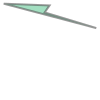

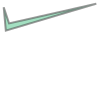

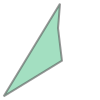

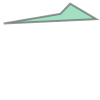

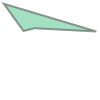

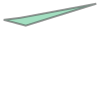

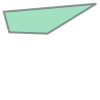

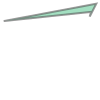

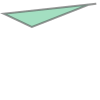

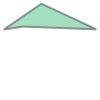

In [3]:
from IPython.display import display

for i in range(10):
    display(polygons_geometries[i])

In [4]:
p=polygons_geometries[0]
# get coordinates of the polygon
np.array(p.exterior.coords.xy)

array([[0.44972709, 0.20101759, 0.70350721, 0.42343044, 0.44972709],
       [0.26223945, 0.27169909, 0.13919741, 0.22441811, 0.26223945]])

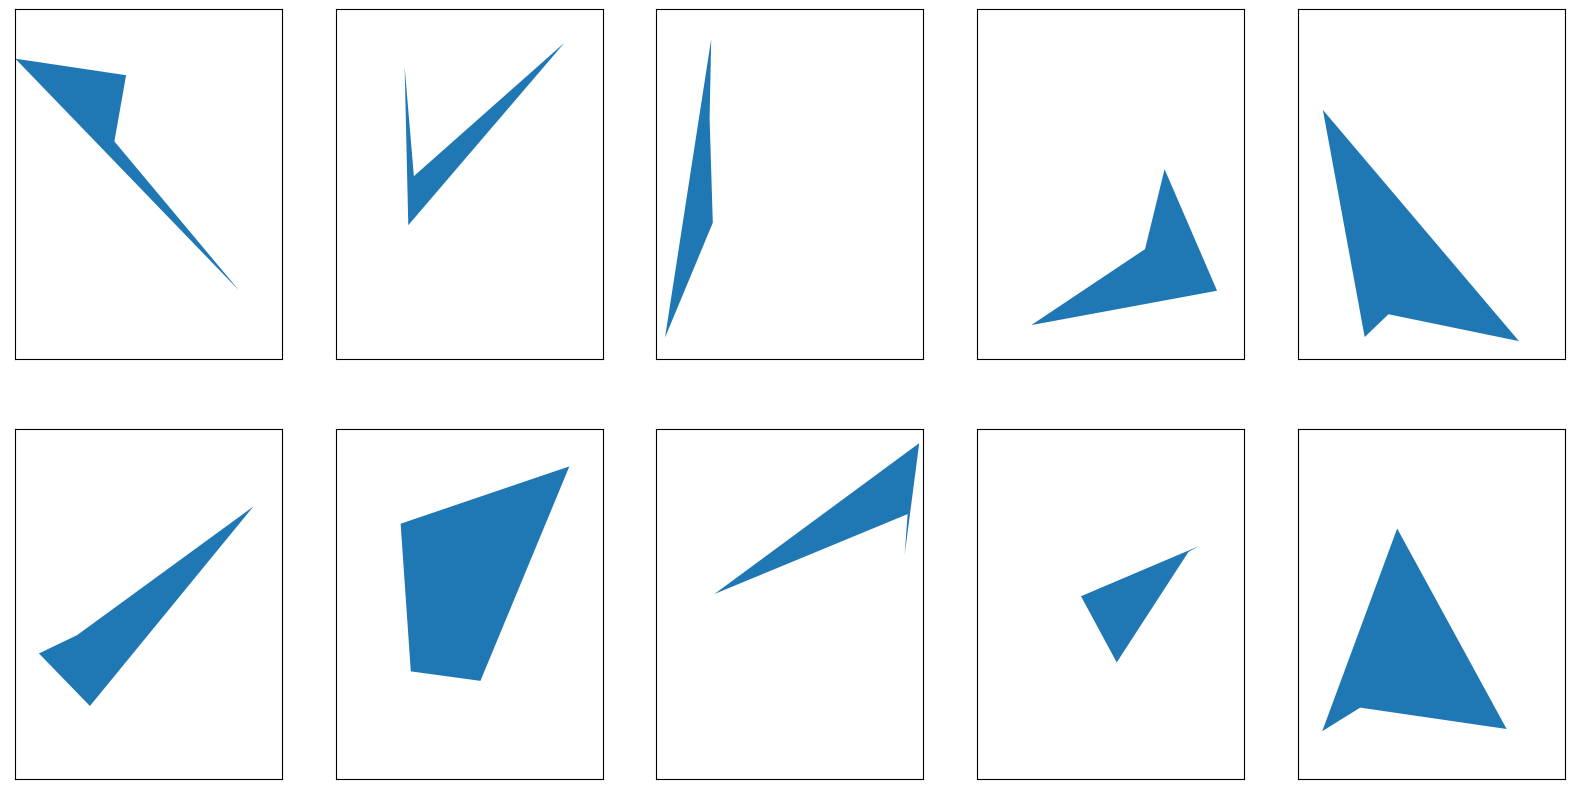

In [5]:
# plot 10 examples in a grid with matplotlib

import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
for i in range(10):
    ax = axs[i//5, i%5]
    ax.add_patch(patches.Polygon(np.array(polygons_geometries[i].exterior.coords), closed=True))
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    # remove ticks and numbers on the axes
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()